In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

Using segment2 data for training. And segment3 data for evaluating.

In [2]:
melEnergyData=pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q1/Segment2_MelEnergy.csv").to_numpy().flatten()
steEnergyData=pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q1/Segment2_STEnergy.csv").to_numpy().flatten()
segment2_GT = pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q1/Segment2_VAD_GT.csv").to_numpy().flatten()

melEnergyDataTest = pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q1/Segment3_MelEnergy.csv").to_numpy().flatten()
steEnergyDataTest = pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q1/Segment3_STEnergy.csv").to_numpy().flatten()
segment3_GT = pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q1/Segment3_VAD_GT.csv").to_numpy().flatten()

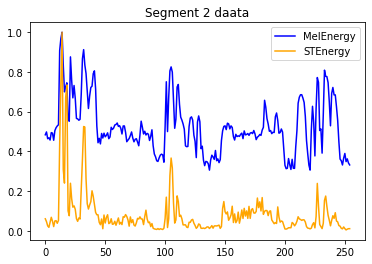

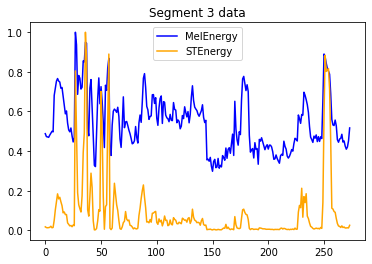

In [3]:
plt.title("Segment 2 daata")
plt.plot(melEnergyData,color="blue")
plt.plot(steEnergyData,color="orange")
plt.legend(["MelEnergy","STEnergy"])
plt.show()

plt.title("Segment 3 data")
plt.plot(melEnergyDataTest,color="blue")
plt.plot(steEnergyDataTest,color="orange")
plt.legend(["MelEnergy","STEnergy"])
plt.show()

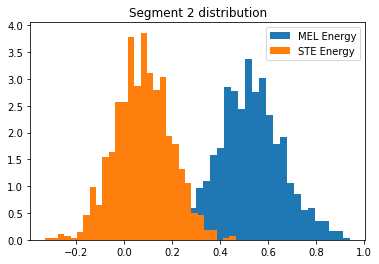

In [4]:
mean_melEnergy = np.mean(melEnergyData)
mean_steEnergy=np.mean(steEnergyData)
std_melEnergy=np.std(melEnergyData)
std_steEnergy=np.std(steEnergyData)
melDistribution = np.random.normal(mean_melEnergy,std_melEnergy,1000)
steDistribution = np.random.normal(mean_steEnergy,std_steEnergy,1000)

plt.title("Segment 2 distribution")
count, bins, ignored = plt.hist(melDistribution, 30, density=True)
count, bins, ignored = plt.hist(steDistribution, 30, density=True)
plt.legend(["MEL Energy","STE Energy"])
plt.show()

In [5]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-0.5 * (((float(x) - float(mean))/sd)**2))
    return num/denom


In [6]:
def getFPRandTPR(estimatedProbability, groundTruth):

  falsePositive = 0
  truePositive = 0
  falseNegative = 0
  trueNegative = 0
  for i in range (len(groundTruth)):
    if(estimatedProbability[i]==1 and groundTruth[i]==1):
      truePositive +=1
    elif estimatedProbability[i] == 0 and groundTruth[i] == 1:
      falseNegative += 1
    elif estimatedProbability[i] == 1 and groundTruth[i] == 0:
      falsePositive += 1
    else:
      trueNegative += 1

  falsePositiveRate = float (falsePositive / (falsePositive + trueNegative))
  truePositiveRate = float(truePositive / (truePositive + falseNegative))

  return [falsePositiveRate,truePositiveRate]

In [7]:
def calcPrior(Y):
  classes = [0,1]
  prior=[]
  for i in classes:
    counter = 0
    for j in Y:
      if j==i:
        counter+=1
    prior.append(counter/len(Y))
  return prior

###Generating class0(non-speech) and class1(speech) for both mel and ste energy

In [8]:
class_0_mel=[]
class_1_mel=[]
class_0_ste=[]
class_1_ste=[]
for i in range(len(segment2_GT)):
  if(segment2_GT[i]==0):
    class_0_mel.append(melEnergyData[i])
    class_0_ste.append(steEnergyData[i])
  else:
    class_1_mel.append(melEnergyData[i])
    class_1_ste.append(steEnergyData[i])

###Generating metrics for training, using segment2 data for training the model

In [9]:
mean_class_0_mel=np.mean(class_0_mel)
std_class_0_mel=np.std(class_0_mel)
mean_class_1_mel=np.mean(class_1_mel)
std_class_1_mel=np.std(class_1_mel)

mean_class_0_ste=np.mean(class_0_ste)
std_class_0_ste=np.std(class_0_ste)
mean_class_1_ste=np.mean(class_1_ste)
std_class_1_ste=np.std(class_1_ste)

###Testing the model on melEnergy for segment3

In [14]:
thresholdArr = sorted(np.random.uniform(0,1,size=1000))
fprc1_mel =[]
tprc1_mel=[]
for threshold in thresholdArr:
  estimatedProbability = [None]*len(segment3_GT)
  for i in range(len(melEnergyData)):
    probabPDF = normpdf(melEnergyDataTest[i],mean_class_1_mel,std_class_1_mel)
    notprobabPDF = normpdf(melEnergyDataTest[i],mean_class_0_mel,std_class_0_mel)
    
    if((probabPDF * 0.435)/(notprobabPDF+probabPDF) >= threshold):
      estimatedProbability[i] = 1
    else:
      estimatedProbability[i] = 0
  rates = getFPRandTPR(estimatedProbability, segment3_GT)
  fprc1_mel.append(rates[0])
  tprc1_mel.append(rates[1])


###Testing model on stEnergy for segment3

In [16]:
thresholdArr = sorted(np.random.uniform(0,1,size=1000))
fprc1_ste =[]
tprc1_ste=[]
for threshold in thresholdArr:
  estimatedProbability = [None]*len(segment3_GT)
  for i in range(len(steEnergyData)):
    probabPDF = normpdf(steEnergyDataTest[i],mean_class_1_ste,std_class_1_ste)
    notprobabPDF = normpdf(steEnergyDataTest[i],mean_class_0_ste,std_class_0_ste)
    
    if((probabPDF * 0.435)/(notprobabPDF+probabPDF) >= threshold):
      estimatedProbability[i] = 1
    else:
      estimatedProbability[i] = 0
  rates = getFPRandTPR(estimatedProbability, segment3_GT)
  fprc1_ste.append(rates[0])
  tprc1_ste.append(rates[1])

###Plotting the ROC curve for both melEnergy and stEnergy for different thresholds

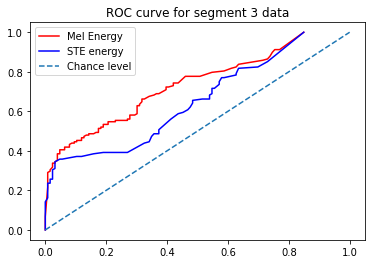

In [19]:
plt.title("ROC curve for segment 3 data")
plt.plot(fprc1_mel,tprc1_mel,color="red")
plt.plot(fprc1_ste,tprc1_ste,color="blue")
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.legend(["Mel Energy","STE energy","Chance level"])
plt.show()

#Inference

From the ROC curve it is evident that model based MEL energy feature is a better choice for detecting speech and non-speech as compared to model based on Short term energy feature.